<a href="https://colab.research.google.com/github/AnoshkinDV/Analysis-Data/blob/master/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
names = 'Name1 Surname1, Name2 Surname2'

In [5]:
names_list = names.split(', ')

In [6]:
names_list


['Name1 Surname1', 'Name2 Surname2']

#2

In [7]:
df= pd.DataFrame({'client_id':np.random.randint(1,1000,30),
                   'sex':np.random.choice([0,1],30),
                   'wealth':np.random.choice(['low','high','medium'],30),
                   'age':np.random.randint(20,70,30)
                   })
df.head()

,client_id,sex,wealth,age
0,814,0,low,59
1,689,1,high,42
2,419,1,high,59
3,871,0,high,49
4,866,1,low,49


In [8]:
# df = pd.DataFrame({'client_id':[9002,6722,8799,8737,5208],
#                   'sex':[1,1,1,0,0],
#                   'wealth':['medium','high','high','low','medium'],
#                   'age':[63,54,62,54,37]})

In [9]:
# medium_35 = df.query("wealth == 'medium' and age>35")
medium_35 = df[(df.wealth == 'medium') & (df.age > 35)]

In [10]:
medium_35

,client_id,sex,wealth,age
12,882,1,medium,62
21,831,1,medium,57
24,517,0,medium,62
25,774,0,medium,51


#3


In [11]:
df_1 = df.rename(columns={'client_id':'Клиент id',
                          'sex':'Пол',
                          'wealth':'Благосостояние',
                          'age':'Возраст'})

In [12]:
df_1

,Клиент id,Пол,Благосостояние,Возраст
0,814,0,low,59
1,689,1,high,42
2,419,1,high,59
3,871,0,high,49
4,866,1,low,49
5,667,1,high,50
6,218,0,medium,35
7,405,1,low,38
8,346,0,high,56
9,936,1,low,57


#4

In [13]:
df['older_than_30'] = df.age.apply(lambda x: True if x>30 else False)

In [14]:
df.head(

)

,client_id,sex,wealth,age,older_than_30
0,814,0,low,59,True
1,689,1,high,42,True
2,419,1,high,59,True
3,871,0,high,49,True
4,866,1,low,49,True


In [15]:
#Можно так
df['older_than_30'] = df.age > 30

In [16]:
df.head()

,client_id,sex,wealth,age,older_than_30
0,814,0,low,59,True
1,689,1,high,42,True
2,419,1,high,59,True
3,871,0,high,49,True
4,866,1,low,49,True


In [17]:
df['older_than_30'].value_counts()

,count
older_than_30,
True,25
False,5


#5

In [18]:
unique_num = df.nunique()

In [19]:
unique_num

,0
client_id,29
sex,2
wealth,3
age,22
older_than_30,2


#6

In [20]:
# Генерация данных
num_rows = 10  # Количество строк

data = pd.DataFrame({
    'client_id': df.client_id.sample(10),  # ID клиента (4-значные числа)
    'amount': np.random.randint(1000, 100000, num_rows),  # Случайные суммы платежей
    'date': np.random.randint(1585425000, 1585430000, num_rows)  # Случайные временные метки
})

In [21]:
data

,client_id,amount,date
5,667,14923,1585425024
21,831,57710,1585427905
16,906,91083,1585425479
17,132,68626,1585425272
13,679,74959,1585428250
26,811,79952,1585426253
20,724,50794,1585428012
15,866,20264,1585426297
10,354,35186,1585427539
0,814,31904,1585428595


In [22]:
full_data = df.merge(data,on='client_id')

In [23]:
full_data

,client_id,sex,wealth,age,older_than_30,amount,date
0,814,0,low,59,True,31904,1585428595
1,866,1,low,49,True,20264,1585426297
2,667,1,high,50,True,14923,1585425024
3,354,1,medium,27,False,35186,1585427539
4,679,0,low,56,True,74959,1585428250
5,866,0,high,46,True,20264,1585426297
6,906,0,high,36,True,91083,1585425479
7,132,0,low,36,True,68626,1585425272
8,724,0,low,34,True,50794,1585428012
9,831,1,medium,57,True,57710,1585427905


#7

In [25]:

def read_n_agg(path):
  data = pd.read_csv(path,sep=';',encoding='windows-1251')
  mean_inc = data.groupby('company').agg({'income':'mean'})
  return mean_inc
path = '3_companies.csv'
mean_income = read_n_agg(path)


FileNotFoundError: [Errno 2] No such file or directory: '3_companies.csv'

#8

In [26]:
taxi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3_taxi_peru.csv',
                   encoding='windows-1251',sep=';',
                   parse_dates=['start_at','end_at','arrived_at'])

In [27]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  datetime64[ns]
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

In [28]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


#9


In [29]:
taxi.groupby('source',as_index=False)\
                      .agg({'journey_id':'count'})\
                      .rename(columns={'journey_id':'count'})\
                      .sort_values('count',ascending=False)\
                      .head(1)


,source,count
3,iPhone,9741


In [30]:
round(taxi.source.value_counts()/len(taxi)*100)

,count
source,
iPhone,42.0
web,33.0
Android,21.0
iPad,2.0
Wap,1.0


#10

In [31]:
taxi_bar = taxi.groupby('source',as_index=False)\
                      .agg({'journey_id':'count'})\
                      .rename(columns={'journey_id':'count_aggrement'})\
                      .sort_values('count_aggrement', ascending=False)


<ipython-input-32-c8881e3c717b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=taxi_bar, x='source', y='count_aggrement',palette='coolwarm')


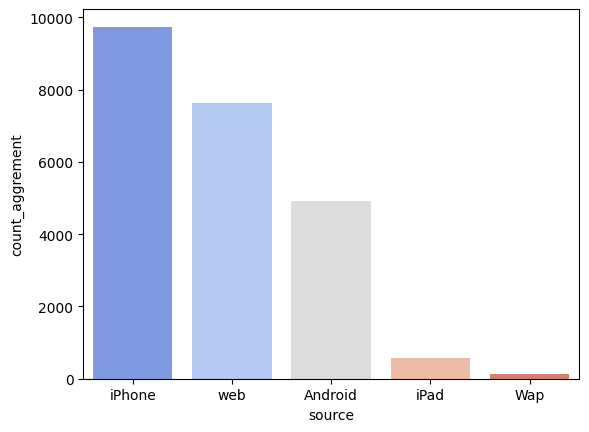

In [32]:
ax = sns.barplot(data=taxi_bar, x='source', y='count_aggrement',palette='coolwarm')

<Axes: xlabel='count', ylabel='source'>

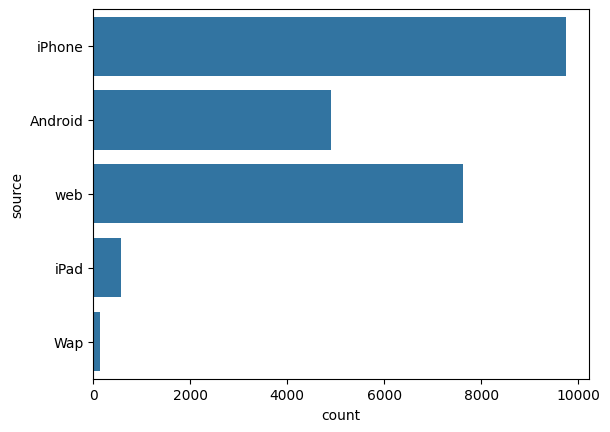

In [33]:
sns.countplot(taxi['source'])

<Axes: xlabel='count', ylabel='icon'>

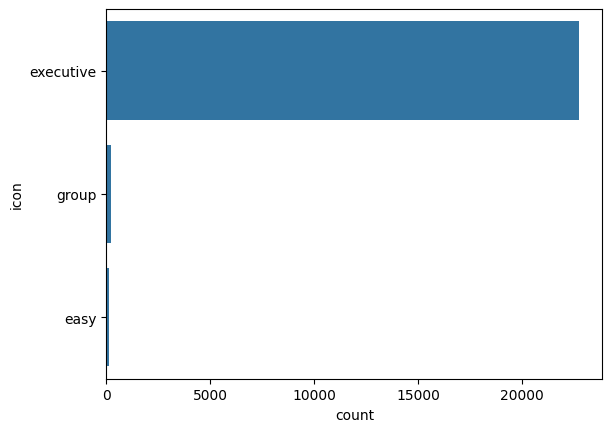

In [34]:
sns.countplot(taxi['icon'])

<Axes: xlabel='source', ylabel='count'>

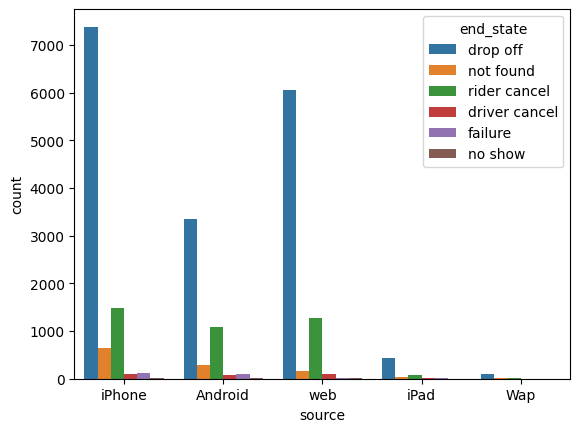

In [35]:
sns.countplot(taxi,x='source',hue='end_state')

In [36]:
taxi.driver_score.head(

)

,driver_score
0,5.0
1,NaN
2,NaN
3,NaN
4,4.0


In [37]:
scores = round(taxi.driver_score.value_counts()/taxi.driver_score.count()*100,2)
# Можно так
# scores = taxi.driver_score.value_counts(normalize=True).mul(100).round(2)


In [38]:
scores

,count
driver_score,
5.0,58.81
4.0,21.88
0.0,14.30
3.0,2.97
1.0,1.23
2.0,0.81


In [40]:
driver_score_counts=scores.reset_index()\
                    .rename(columns={'count':'percentage'})\
                    .sort_values('driver_score')

In [41]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [42]:
#А можно и так
scores = taxi.source.value_counts().mul(100).round(2)

In [43]:
scores

,count
source,
iPhone,974100
web,763100
Android,490900
iPad,57100
Wap,13600


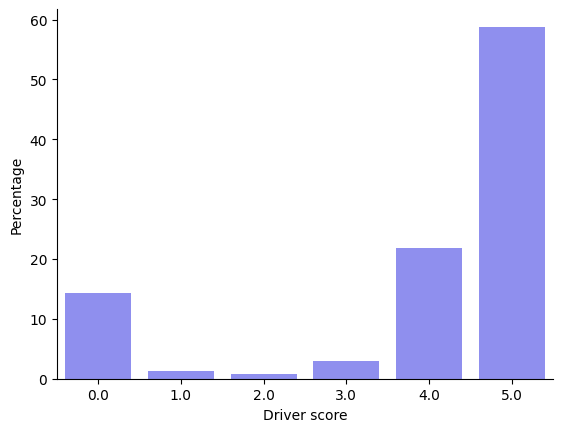

In [44]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [45]:
scores_rider = taxi.rider_score.value_counts(normalize=True).mul(100).round(2)


In [59]:
scores = scores_rider.reset_index()

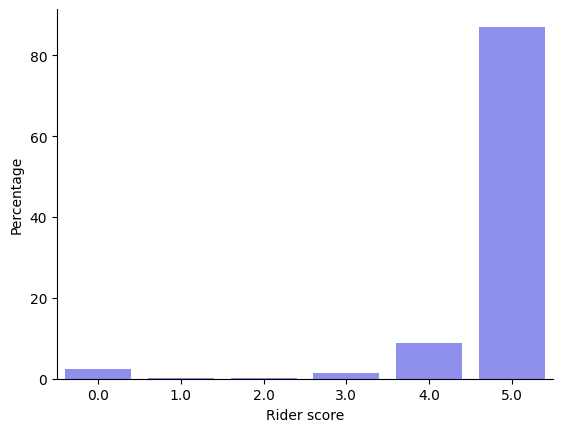

In [60]:
ax = sns.barplot(x='rider_score', y='proportion', data=scores, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [61]:
s = pd.Series([1, 2, 3, 4], name='foo',
              index=pd.Index(['a', 'b', 'c', 'd'], name='idx'))

In [62]:
s.reset_index()

,idx,foo
0,a,1
1,b,2
2,c,3
3,d,4
